In [69]:
# Libraries import
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

In [13]:
# Data import and exploration
df = pd.read_csv('https://raw.githubusercontent.com/easonlai/InsuranceClaimPredictionSample01/master/insurance2.csv', sep=',')

Goal:

to predict whether a patient would claim from the insurance.


Features:
- age - age of policyholder
- sex - gender of policy holder (female=0, male=1) 
- bmi - Body mass index (kg/m^2) using the ratio of height to weight, ideally 18.5 to 25
- children - number of children/dependents of policyholder 
- smoker - non-smoke=0, smoker=1 
- region - the residential area of policyholder in the US (northeast=0, northwest=1, - southeast=2, southwest=3) 
- charges - individual medical costs billed by health insurance,
- insuranceclaim - whether insurance was claimed.

In [14]:
# Data exploration
df.head()

,age,sex,bmi,children,smoker,region,charges,insuranceclaim
0,19,0,27.900,0,1,3,16884.92400,1
1,18,1,33.770,1,0,2,1725.55230,1
2,28,1,33.000,3,0,2,4449.46200,0
3,33,1,22.705,0,0,1,21984.47061,0
4,32,1,28.880,0,0,1,3866.85520,1


In [35]:
print(df.shape)
print(df.isna().sum())

(1338, 8)
age               0
sex               0
bmi               0
children          0
smoker            0
region            0
charges           0
insuranceclaim    0
dtype: int64


In [58]:
df.describe()

,age,sex,bmi,children,smoker,region,charges,insuranceclaim
count,1338.000000,1338.000000,1338.000000,1338.000000,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,0.505232,30.663397,1.094918,0.204783,1.515695,13270.422265,0.585202
std,14.049960,0.500160,6.098187,1.205493,0.403694,1.104885,12110.011237,0.492871
min,18.000000,0.000000,15.960000,0.000000,0.000000,0.000000,1121.873900,0.000000
25%,27.000000,0.000000,26.296250,0.000000,0.000000,1.000000,4740.287150,0.000000
50%,39.000000,1.000000,30.400000,1.000000,0.000000,2.000000,9382.033000,1.000000
75%,51.000000,1.000000,34.693750,2.000000,0.000000,2.000000,16639.912515,1.000000
max,64.000000,1.000000,53.130000,5.000000,1.000000,3.000000,63770.428010,1.000000


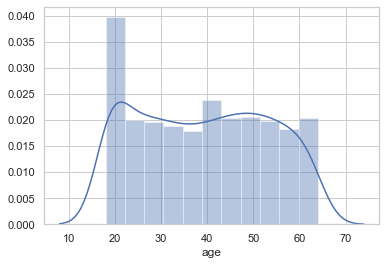

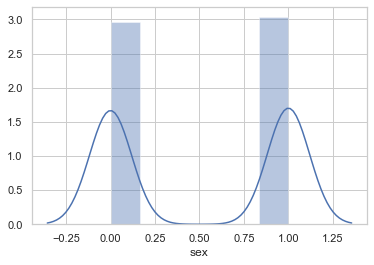

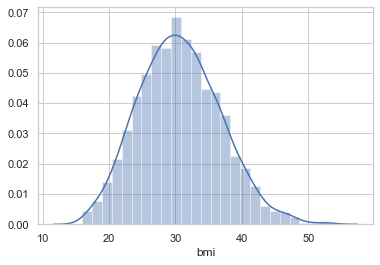

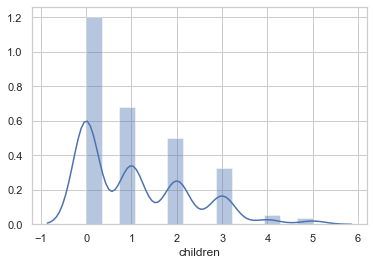

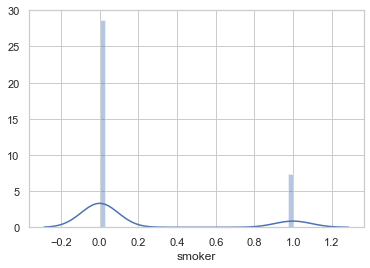

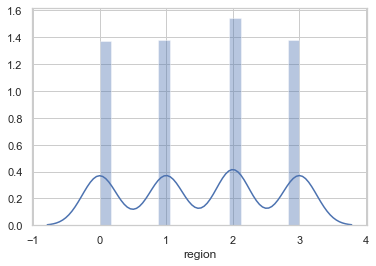

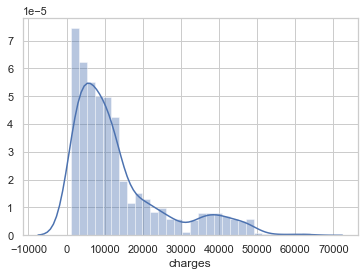

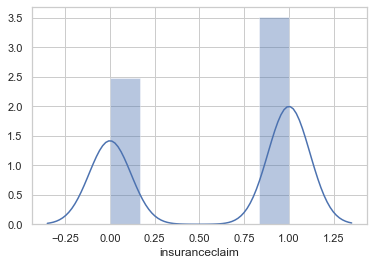

In [240]:
# Plotting the data distributions
for i, feature in enumerate(df.columns):
    plt.figure(i)
    sns.distplot(df[feature])

In [246]:
# Data standarization
binary_features = ['sex', 'smoker', 'insuranceclaim']
df_to_standarize = df.drop(labels=binary_features, axis=1)

df_standarized = (df_to_standarize.iloc[:,:-1] - np.mean(df_to_standarize.iloc[:,:-1], axis=0)) / np.std(df_to_standarize.iloc[:,:-1], axis=0)

df_standarized = df_standarized.join(pd.DataFrame(
    {
        'sex': df['sex'],
        'smoker': df['smoker'],
        'insurance_claim': df['insuranceclaim']
    }, index=df.index
))

print(df_standarized.head())
print(df_standarized.describe())

        age       bmi  children    region  sex  smoker  insurance_claim
0 -1.438764 -0.453320 -0.908614  1.343905    0       1                1
1 -1.509965  0.509621 -0.078767  0.438495    1       0                1
2 -0.797954  0.383307  1.580926  0.438495    1       0                0
3 -0.441948 -1.305531 -0.908614 -0.466915    1       0                0
4 -0.513149 -0.292556 -0.908614 -0.466915    1       0                1
                age           bmi      children        region          sex  \
count  1.338000e+03  1.338000e+03  1.338000e+03  1.338000e+03  1338.000000   
mean  -1.805565e-16 -2.124194e-16 -5.576008e-17  9.027823e-17     0.505232   
std    1.000374e+00  1.000374e+00  1.000374e+00  1.000374e+00     0.500160   
min   -1.509965e+00 -2.412011e+00 -9.086137e-01 -1.372326e+00     0.000000   
25%   -8.691547e-01 -7.164063e-01 -9.086137e-01 -4.669155e-01     0.000000   
50%   -1.474046e-02 -4.320880e-02 -7.876719e-02  4.384945e-01     1.000000   
75%    8.396738e-01  6

In [247]:
# Splitting dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(df_standarized.iloc[:,:-1], df_standarized.iloc[:,-1], test_size=0.25)
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(1003, 6)
(335, 6)
(1003,)
(335,)


In [248]:
# Creating Linear Regression Model
model = LogisticRegression()
model.fit(X_train, y_train)

LogisticRegression()

In [250]:
feature_coeff = list(zip(model.coef_[0],X_train.columns.values))

feature_impact = pd.DataFrame()
feature_impact['Feature'] = [x[1] for x in feature_coeff]
feature_impact['Impact'] = [x[0] for x in feature_coeff]
feature_impact.sort_values(by=['Impact'], ascending=True, inplace=True)

display(feature_impact)

,Feature,Impact
2,children,-1.584860
4,sex,-0.165157
3,region,-0.161776
0,age,0.342154
1,bmi,1.456211
5,smoker,3.799032


Text(0, 0.5, 'Feature')

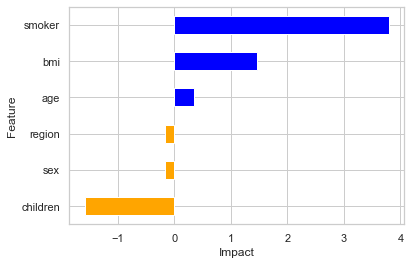

In [251]:
sns.set(style="whitegrid")
feature_impact.set_index('Feature', inplace=True)
feature_impact['positive'] = feature_impact['Impact']>0
feature_impact.Impact.plot(kind='barh', 
                           color = feature_impact.positive.map({True: 'blue', False: 'orange'}))
plt.xlabel('Impact')
plt.ylabel('Feature')

# plt.barh(feature_impact.index, feature_impact.Impact, align='center')
# plt.ylabel('Feature')
# plt.xlabel('Impact')
# plt.title('The importance (impact) of single feature')

In [261]:
display(df_standarized[['region','insurance_claim']].corr())
display(df_standarized[['sex','insurance_claim']].corr())
display(df_standarized[['children','insurance_claim']].corr())

,region,insurance_claim
region,1.000000,0.020891
insurance_claim,0.020891,1.000000


,sex,insurance_claim
sex,1.000000,0.031565
insurance_claim,0.031565,1.000000


,children,insurance_claim
children,1.000000,-0.409526
insurance_claim,-0.409526,1.000000


Smoking and BMI have be the most significant features in the model. That seems to be reasonable since the model should predict whether a patient would claim from the insurance. As it is commonly known smoking and hight BMI heavily affect our health and therefore might contribute taking advantage of insurance.

Children have a negative impact on the prediction.

In [215]:
X_train.columns.values

array(['age', 'bmi', 'charges', 'children', 'region', 'sex', 'smoker'],
      dtype=object)

In [77]:
# Making prediction
y_pred = model.predict(X_test)
y_pred

array([0, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1,
       1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1,
       0, 1, 0, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1,
       1, 0, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0,
       0, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1,
       0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0,
       1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1,
       1, 1, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0,
       1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0,
       1, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1,
       1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0,
       1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1,
       0, 1, 0, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1,

In [81]:
# Measuring Error rate
accuracy_score(y_test, y_pred)

0.8955223880597015